In [15]:
import pandas as pd
data = {
    "Tanggal":["2025-02-01","2025-02-03","2025-02-04","2025-02-05","2025-02-07","2025-02-08","2025-02-10","2025-02-11","2025-02-13","2025-02-15"],
    "Produk":["Sabun cair","Sikat Gigi","Shampo","Odol","Kondisioner","Sabun Muka","Parpum","Beras","Minyak","Telur"],
    "jumlah terjual":[5,7,4,8,9,12,6,4,9,14],
    "stok":[10,15,18,25,30,25,24,20,30,27],
    "harga satuan":[16000, 5000, 4000, 5000,7000,3000,2000,6000,7000,5000],
}

dt = pd.DataFrame(data)
dt.to_csv("Juan Faturohman_2306002_Pertemuan 1_Latihan Workflow AI.csv")
dt


,Tanggal,Produk,jumlah terjual,stok,harga satuan
0,2025-02-01,Sabun cair,5,10,16000
1,2025-02-03,Sikat Gigi,7,15,5000
2,2025-02-04,Shampo,4,18,4000
3,2025-02-05,Odol,8,25,5000
4,2025-02-07,Kondisioner,9,30,7000
5,2025-02-08,Sabun Muka,12,25,3000
6,2025-02-10,Parpum,6,24,2000
7,2025-02-11,Beras,4,20,6000
8,2025-02-13,Minyak,9,30,7000
9,2025-02-15,Telur,14,27,5000


In [16]:
dt["Tanggal"] = pd.to_datetime(dt["Tanggal"])
dt["Total Penjualan"] = dt ["jumlah terjual"] * dt["harga satuan"]
dt["Keuntungan"] = (dt["Total Penjualan"]-dt["jumlah terjual"]*10000)

dt

,Tanggal,Produk,jumlah terjual,stok,harga satuan,Total Penjualan,Keuntungan
0,2025-02-01,Sabun cair,5,10,16000,80000,30000
1,2025-02-03,Sikat Gigi,7,15,5000,35000,-35000
2,2025-02-04,Shampo,4,18,4000,16000,-24000
3,2025-02-05,Odol,8,25,5000,40000,-40000
4,2025-02-07,Kondisioner,9,30,7000,63000,-27000
5,2025-02-08,Sabun Muka,12,25,3000,36000,-84000
6,2025-02-10,Parpum,6,24,2000,12000,-48000
7,2025-02-11,Beras,4,20,6000,24000,-16000
8,2025-02-13,Minyak,9,30,7000,63000,-27000
9,2025-02-15,Telur,14,27,5000,70000,-70000


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = dt[["jumlah terjual","stok"]]
y = (dt["stok"] < 5)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

model = DecisionTreeClassifier() # Defining the model
model.fit (x_train,y_train) # Training the model

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(x_test)
print("Akurasi model:",accuracy_score(y_test, y_pred))

Akurasi model: 1.0


In [19]:
produk_baru = [[8, 6]]
predict = model.predict(produk_baru)

if predict[0] == 1:
  print("perlu di restock")
else:
  print("stock cukup")

stock cukup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


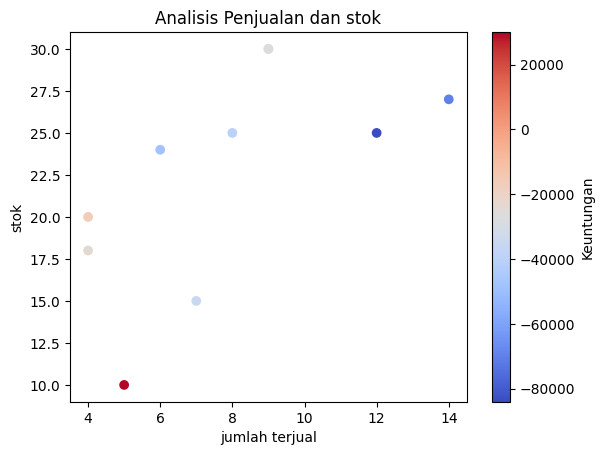

In [20]:
import matplotlib.pyplot as plt

plt.scatter(dt["jumlah terjual"], dt["stok"], c=dt["Keuntungan"], cmap="coolwarm")
plt.xlabel("jumlah terjual")
plt.ylabel("stok")
plt.title("Analisis Penjualan dan stok")
plt.colorbar(label="Keuntungan")
plt.show()